\begin{equation}
x_t = \sqrt{\bar{\alpha}_t} x_0 + \sqrt{1 - \bar{\alpha}_t} \epsilon, \quad \text{with } \epsilon \sim \mathcal{N}(0, I)
\end{equation}

In [3]:
import torch
import torch.nn as nn

class Diffusion_Forward:
    def __init__(self, T):
        assert T > 0, 't should be greater than 0'

        self.T = T
        self.beta = torch.linspace(0.0001, 0.02, T)
        self.alpha = 1 - self.beta
        self.alpha_bar = torch.cumprod(self.alpha, dim=0)
        self.sqrt_alpha_bar = torch.sqrt(self.alpha_bar)
        self.sqrt_one_minus_alpha_bar = torch.sqrt(1 - self.alpha_bar)
    
    def forward(self, x0, t):        
        t = t - 1
        mean = self.sqrt_alpha_bar[t] * x0
        epsilon = torch.randn_like(x0)
        std = self.sqrt_one_minus_alpha_bar[t]
        return mean + std * epsilon

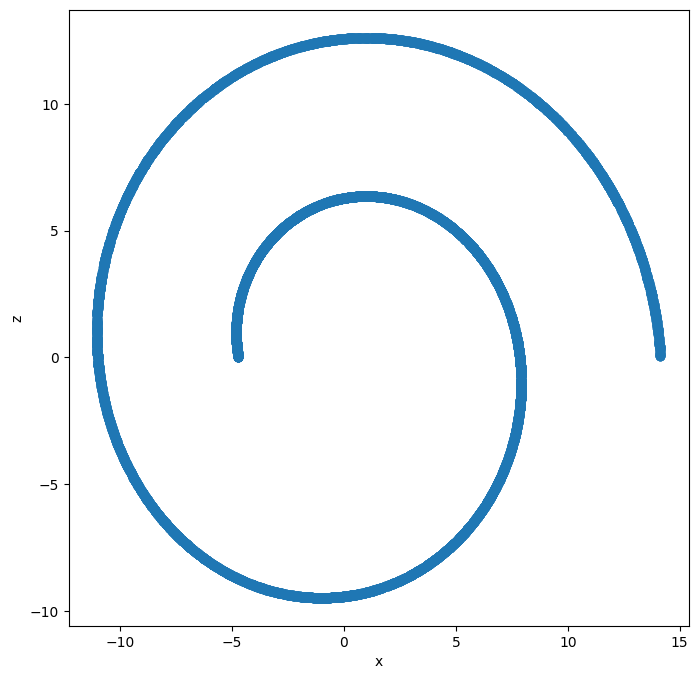

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
# make_swiss_roll and plot_swiss_roll are from sklearn.datasets
X, t = make_swiss_roll(n_samples=10000, random_state=42)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 2], X[:, 0])
plt.xlabel("x")
plt.ylabel("z")
plt.show()

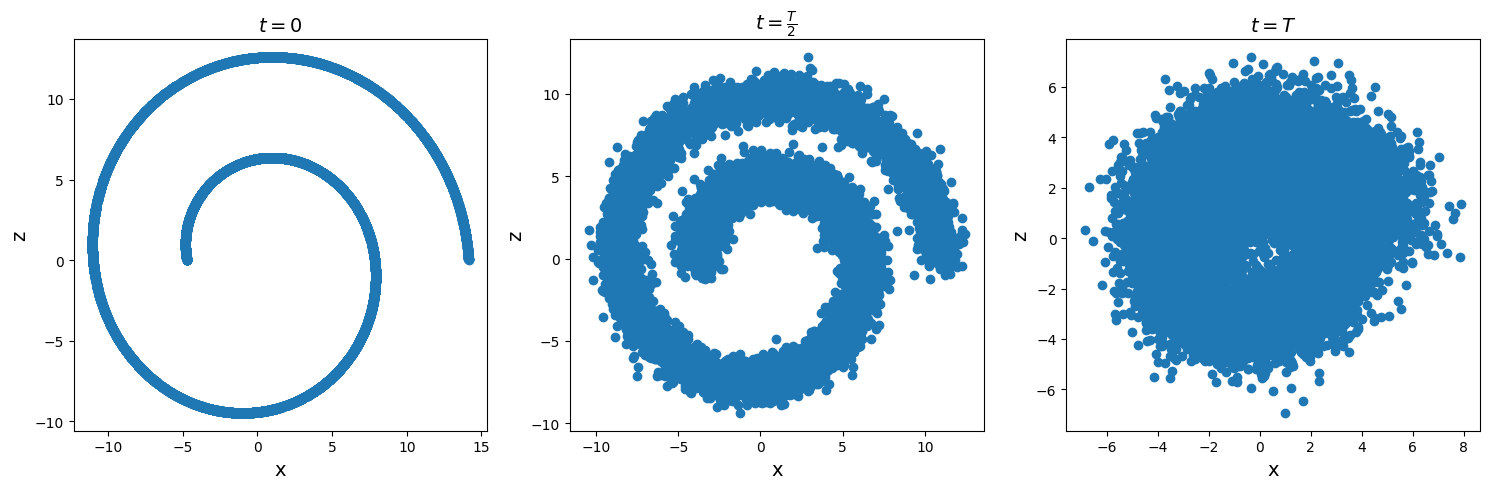

In [5]:
X_tensor = torch.tensor(X, dtype=torch.float32).requires_grad_(False)

T = 200
diffusion = Diffusion_Forward(T)
data = [X_tensor, diffusion.forward(X_tensor, T//2), diffusion.forward(X_tensor, T)]

fontsize = 14
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

titles = [r"$t = 0$", r"$t = \frac{T}{2}$", r"$t = T$"]

for i in range(3):
    ax[i].scatter(data[i][:, 2], data[i][:, 0])
    ax[i].set_xlabel("x", fontsize=fontsize)
    ax[i].set_ylabel("z", fontsize=fontsize)
    ax[i].set_title(titles[i], fontsize=fontsize)  

plt.tight_layout()
plt.show()